<p style="background-color:#FF1493; font-family:calibri; color:white; font-size:40px; text-align:center; border-radius:50px 50px;">Breast Cancer Risk Prediction</p>

In [2]:
import pingouin as pg
import datetime as dt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy.stats import mode
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV

from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index

import ipywidgets as widgets
from IPython.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Breast_Cancer_Data.csv")

In [6]:
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,75.65,Mastectomy,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4.0,Right,10.0,5.0,6.044,IDC,140.500000,Negative,Yes,138.65,Not Recurred,ER-/HER2-,22.0,2.0,0
1,43.19,Breast Conserving,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4.0,Right,0.0,2.0,4.020,IDC,84.633333,Positive,Yes,83.52,Not Recurred,ER+/HER2- High Prolif,10.0,1.0,0
2,48.87,Mastectomy,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3.0,Right,1.0,2.0,4.030,IDC,163.700000,Positive,No,151.28,Recurred,ER+/HER2- Low Prolif,15.0,2.0,1
3,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9.0,Right,3.0,1.0,4.050,MDLC,164.933333,Positive,Yes,162.76,Not Recurred,ER+/HER2- Low Prolif,25.0,2.0,0
4,76.97,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9.0,Right,8.0,2.0,6.080,MDLC,41.366667,Positive,Yes,18.55,Recurred,ER+/HER2- High Prolif,40.0,2.0,1


In [8]:
df.shape

(2420, 30)

# <p style="background-color:#FF1493; font-family:calibri; color:white; font-size:35px; text-align:center; border-radius:50px 50px;">6. Feature Engineering</p>

## <b><span style='color:#FF69B4'>Step 6.1 |</span><span style='color:#FF1493'>  Feature Encoding</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
The dataset has both nominal data and ordinal data, so accordingly we will use separate encoding techniques to encode them. We will use ordinal encoding for the ordinal features and one hot encoding for the nominal features. 

In [13]:
# Check rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", missing_rows)

Rows with missing values:
 Empty DataFrame
Columns: [Age at Diagnosis, Type of Breast Surgery, Cancer Type Detailed, Cellularity, Chemotherapy, Pam50 + Claudin-low subtype, Cohort, ER status measured by IHC, ER Status, Neoplasm Histologic Grade, HER2 status measured by SNP6, HER2 Status, Tumor Other Histologic Subtype, Hormone Therapy, Inferred Menopausal State, Integrative Cluster, Primary Tumor Laterality, Lymph nodes examined positive, Mutation Count, Nottingham prognostic index, Oncotree Code, Overall Survival (Months), PR Status, Radio Therapy, Relapse Free Status (Months), Relapse Free Status, 3-Gene classifier subtype, Tumor Size, Tumor Stage, Patient's Vital Status]
Index: []


In [15]:
categorical_columns = df.iloc[:, [1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 16, 20, 22, 23, 25, 26]]
numerical_columns = df.iloc[:, [0, 6, 9, 15, 17, 18, 19, 21, 24, 27, 28]]

In [17]:
ordinal_cols = df.columns[[3, 10]]
nominal_cols = df.columns[[1, 2, 4, 5, 7, 8, 11, 12, 13, 14, 16, 20, 22, 23, 25, 26]]

In [19]:
ordinal_cols.isna().sum()

0

In [21]:
nominal_cols.isna().sum()

0

In [23]:
df.isna().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status               0
3-Gene classifier subtype         0
Tumor Size                  

In [25]:
categorical_columns.isna().sum()

Type of Breast Surgery            0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
ER status measured by IHC         0
ER Status                         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Primary Tumor Laterality          0
Oncotree Code                     0
PR Status                         0
Radio Therapy                     0
Relapse Free Status               0
3-Gene classifier subtype         0
dtype: int64

In [27]:
numerical_columns.isna().sum()

Age at Diagnosis                 0
Cohort                           0
Neoplasm Histologic Grade        0
Integrative Cluster              0
Lymph nodes examined positive    0
Mutation Count                   0
Nottingham prognostic index      0
Overall Survival (Months)        0
Relapse Free Status (Months)     0
Tumor Size                       0
Tumor Stage                      0
dtype: int64

In [29]:
# Check for missing values and duplicates before encoding
print("Missing values before encoding:", df.isnull().sum().sum())
print("Duplicates before encoding:", df.duplicated().sum())

Missing values before encoding: 0
Duplicates before encoding: 0


In [31]:
# Ordinal Encoding the ordinal columns
# Create an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()

# Fit and transform the specified columns using OrdinalEncoder
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

In [33]:
ordinal_cols.isna().sum()

0

In [35]:
# One hot encoding the nominal columns
nominal_cols = df.columns[[1, 2, 4, 5, 7, 8, 11, 12, 13, 14, 16, 20, 22, 23, 25, 26]]

# Create a OneHotEncoder object
encoder_oh = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
onehot_encoded = encoder_oh.fit_transform(df[nominal_cols])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder_oh.get_feature_names_out(nominal_cols))

In [37]:
print("Missing values after encoding:", encoded_df.isnull().sum().sum())
print("Duplicates after encoding:", encoded_df.duplicated().sum())

Missing values after encoding: 0
Duplicates after encoding: 1235


In [39]:
encoded_df

,Type of Breast Surgery_Breast Conserving,Type of Breast Surgery_Mastectomy,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Chemotherapy_No,Chemotherapy_Yes,Pam50 + Claudin-low subtype_Basal,Pam50 + Claudin-low subtype_Her2,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,ER status measured by IHC_Negative,ER status measured by IHC_Positve,ER Status_Negative,ER Status_Positive,HER2 Status_Negative,HER2 Status_Positive,Tumor Other Histologic Subtype_Ductal/NST,Tumor Other Histologic Subtype_Lobular,Tumor Other Histologic Subtype_Medullary,Tumor Other Histologic Subtype_Mixed,Tumor Other Histologic Subtype_Mucinous,Tumor Other Histologic Subtype_Tubular/ cribriform,Hormone Therapy_No,Hormone Therapy_Yes,Inferred Menopausal State_Post,Inferred Menopausal State_Pre,Primary Tumor Laterality_Left,Primary Tumor Laterality_Right,Oncotree Code_BRCA,Oncotree Code_IDC,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MDLC,PR Status_Negative,PR Status_Positive,Radio Therapy_No,Radio Therapy_Yes,Relapse Free Status_Not Recurred,Relapse Free Status_Recurred,3-Gene classifier subtype_ER+/HER2- High Prolif,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2416,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2417,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2418,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [41]:
duplicates = encoded_df[encoded_df.duplicated(keep='first')]
print(duplicates.shape)
duplicates.head()

(1235, 48)


,Type of Breast Surgery_Breast Conserving,Type of Breast Surgery_Mastectomy,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Chemotherapy_No,Chemotherapy_Yes,Pam50 + Claudin-low subtype_Basal,Pam50 + Claudin-low subtype_Her2,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,ER status measured by IHC_Negative,ER status measured by IHC_Positve,ER Status_Negative,ER Status_Positive,HER2 Status_Negative,HER2 Status_Positive,Tumor Other Histologic Subtype_Ductal/NST,Tumor Other Histologic Subtype_Lobular,Tumor Other Histologic Subtype_Medullary,Tumor Other Histologic Subtype_Mixed,Tumor Other Histologic Subtype_Mucinous,Tumor Other Histologic Subtype_Tubular/ cribriform,Hormone Therapy_No,Hormone Therapy_Yes,Inferred Menopausal State_Post,Inferred Menopausal State_Pre,Primary Tumor Laterality_Left,Primary Tumor Laterality_Right,Oncotree Code_BRCA,Oncotree Code_IDC,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MDLC,PR Status_Negative,PR Status_Positive,Radio Therapy_No,Radio Therapy_Yes,Relapse Free Status_Not Recurred,Relapse Free Status_Recurred,3-Gene classifier subtype_ER+/HER2- High Prolif,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+
12,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
63,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
68,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
78,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
94,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [43]:
# Columns to drop
df.drop(nominal_cols, axis=1, inplace=True)

In [45]:
df.head()

,Age at Diagnosis,Cellularity,Cohort,Neoplasm Histologic Grade,HER2 status measured by SNP6,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage,Patient's Vital Status
0,75.65,0.0,1.0,3.0,2.0,4.0,10.0,5.0,6.044,140.500000,138.65,22.0,2.0,0
1,43.19,0.0,1.0,3.0,2.0,4.0,0.0,2.0,4.020,84.633333,83.52,10.0,1.0,0
2,48.87,0.0,1.0,2.0,2.0,3.0,1.0,2.0,4.030,163.700000,151.28,15.0,2.0,1
3,47.68,2.0,1.0,2.0,2.0,9.0,3.0,1.0,4.050,164.933333,162.76,25.0,2.0,0
4,76.97,0.0,1.0,3.0,2.0,9.0,8.0,2.0,6.080,41.366667,18.55,40.0,2.0,1


In [47]:
df.shape

(2420, 14)

In [49]:
# Resetting the indexes before concatenating
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

In [51]:
# Merge DataFrames based on their indexes
data = df.merge(encoded_df, left_index=True, right_index=True)
data.head()

,Age at Diagnosis,Cellularity,Cohort,Neoplasm Histologic Grade,HER2 status measured by SNP6,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage,Patient's Vital Status,Type of Breast Surgery_Breast Conserving,Type of Breast Surgery_Mastectomy,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Chemotherapy_No,Chemotherapy_Yes,Pam50 + Claudin-low subtype_Basal,Pam50 + Claudin-low subtype_Her2,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,ER status measured by IHC_Negative,ER status measured by IHC_Positve,ER Status_Negative,ER Status_Positive,HER2 Status_Negative,HER2 Status_Positive,Tumor Other Histologic Subtype_Ductal/NST,Tumor Other Histologic Subtype_Lobular,Tumor Other Histologic Subtype_Medullary,Tumor Other Histologic Subtype_Mixed,Tumor Other Histologic Subtype_Mucinous,Tumor Other Histologic Subtype_Tubular/ cribriform,Hormone Therapy_No,Hormone Therapy_Yes,Inferred Menopausal State_Post,Inferred Menopausal State_Pre,Primary Tumor Laterality_Left,Primary Tumor Laterality_Right,Oncotree Code_BRCA,Oncotree Code_IDC,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MDLC,PR Status_Negative,PR Status_Positive,Radio Therapy_No,Radio Therapy_Yes,Relapse Free Status_Not Recurred,Relapse Free Status_Recurred,3-Gene classifier subtype_ER+/HER2- High Prolif,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+
0,75.65,0.0,1.0,3.0,2.0,4.0,10.0,5.0,6.044,140.500000,138.65,22.0,2.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,43.19,0.0,1.0,3.0,2.0,4.0,0.0,2.0,4.020,84.633333,83.52,10.0,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,48.87,0.0,1.0,2.0,2.0,3.0,1.0,2.0,4.030,163.700000,151.28,15.0,2.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,47.68,2.0,1.0,2.0,2.0,9.0,3.0,1.0,4.050,164.933333,162.76,25.0,2.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.97,0.0,1.0,3.0,2.0,9.0,8.0,2.0,6.080,41.366667,18.55,40.0,2.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [53]:
print("Missing values after concatenating:", data.isnull().sum().sum())
print("Duplicates after concatenating:", data.duplicated().sum())

Missing values after concatenating: 0
Duplicates after concatenating: 0


In [55]:
# Check rows with missing values
missing_rows = data[data.isnull().any(axis=1)]
# Rows with missing values
print("Rows with missing values:\n", missing_rows)

Rows with missing values:
 Empty DataFrame
Columns: [Age at Diagnosis, Cellularity, Cohort, Neoplasm Histologic Grade, HER2 status measured by SNP6, Integrative Cluster, Lymph nodes examined positive, Mutation Count, Nottingham prognostic index, Overall Survival (Months), Relapse Free Status (Months), Tumor Size, Tumor Stage, Patient's Vital Status, Type of Breast Surgery_Breast Conserving, Type of Breast Surgery_Mastectomy, Cancer Type Detailed_Breast Invasive Ductal Carcinoma, Cancer Type Detailed_Breast Invasive Lobular Carcinoma, Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma, Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma, Cancer Type Detailed_Invasive Breast Carcinoma, Chemotherapy_No, Chemotherapy_Yes, Pam50 + Claudin-low subtype_Basal, Pam50 + Claudin-low subtype_Her2, Pam50 + Claudin-low subtype_LumA, Pam50 + Claudin-low subtype_LumB, Pam50 + Claudin-low subtype_Normal, Pam50 + Claudin-low subtype_claudin-low, ER status measured by IHC_Negative, 

In [57]:
data.shape

(2420, 62)

In [59]:
data.head()

,Age at Diagnosis,Cellularity,Cohort,Neoplasm Histologic Grade,HER2 status measured by SNP6,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage,Patient's Vital Status,Type of Breast Surgery_Breast Conserving,Type of Breast Surgery_Mastectomy,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Chemotherapy_No,Chemotherapy_Yes,Pam50 + Claudin-low subtype_Basal,Pam50 + Claudin-low subtype_Her2,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,ER status measured by IHC_Negative,ER status measured by IHC_Positve,ER Status_Negative,ER Status_Positive,HER2 Status_Negative,HER2 Status_Positive,Tumor Other Histologic Subtype_Ductal/NST,Tumor Other Histologic Subtype_Lobular,Tumor Other Histologic Subtype_Medullary,Tumor Other Histologic Subtype_Mixed,Tumor Other Histologic Subtype_Mucinous,Tumor Other Histologic Subtype_Tubular/ cribriform,Hormone Therapy_No,Hormone Therapy_Yes,Inferred Menopausal State_Post,Inferred Menopausal State_Pre,Primary Tumor Laterality_Left,Primary Tumor Laterality_Right,Oncotree Code_BRCA,Oncotree Code_IDC,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MDLC,PR Status_Negative,PR Status_Positive,Radio Therapy_No,Radio Therapy_Yes,Relapse Free Status_Not Recurred,Relapse Free Status_Recurred,3-Gene classifier subtype_ER+/HER2- High Prolif,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+
0,75.65,0.0,1.0,3.0,2.0,4.0,10.0,5.0,6.044,140.500000,138.65,22.0,2.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,43.19,0.0,1.0,3.0,2.0,4.0,0.0,2.0,4.020,84.633333,83.52,10.0,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,48.87,0.0,1.0,2.0,2.0,3.0,1.0,2.0,4.030,163.700000,151.28,15.0,2.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,47.68,2.0,1.0,2.0,2.0,9.0,3.0,1.0,4.050,164.933333,162.76,25.0,2.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.97,0.0,1.0,3.0,2.0,9.0,8.0,2.0,6.080,41.366667,18.55,40.0,2.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## <b><span style='color:#FF69B4'>Step 6.2 |</span><span style='color:#FF1493'>  Feature Transformation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
Box-Cox transformation is a powerful method to stabilize variance and make the data more normal-distribution-like. It's particularly useful when you're unsure about the exact nature of the distribution you're dealing with, as it can adapt itself to the best power transformation. However, the Box-Cox transformation only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
    
**Data Leakage Concerns**
When applying transformation or scaling techniques, especially applying transformations like the Box-Cox, it's essential to be wary of data leakage. Data leakage refers to a mistake in the preprocessing of data in which information from outside the training dataset is used to transform or train the model. This can lead to overly optimistic performance metrics.<br>

To avoid data leakage and ensure our model generalizes well to unseen data we will first split our dataset into a training set and a test set and then perform the techniques.

In [66]:
# Define the features (X) and the output labels (y)
X = data.drop('Patient\'s Vital Status', axis=1)
y = data['Patient\'s Vital Status'] 

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### <b><span style='color:#FF69B4'>Box-cox Transformation

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
The Box-Cox transformation requires all data to be strictly positive. So we will only apply it for positive values

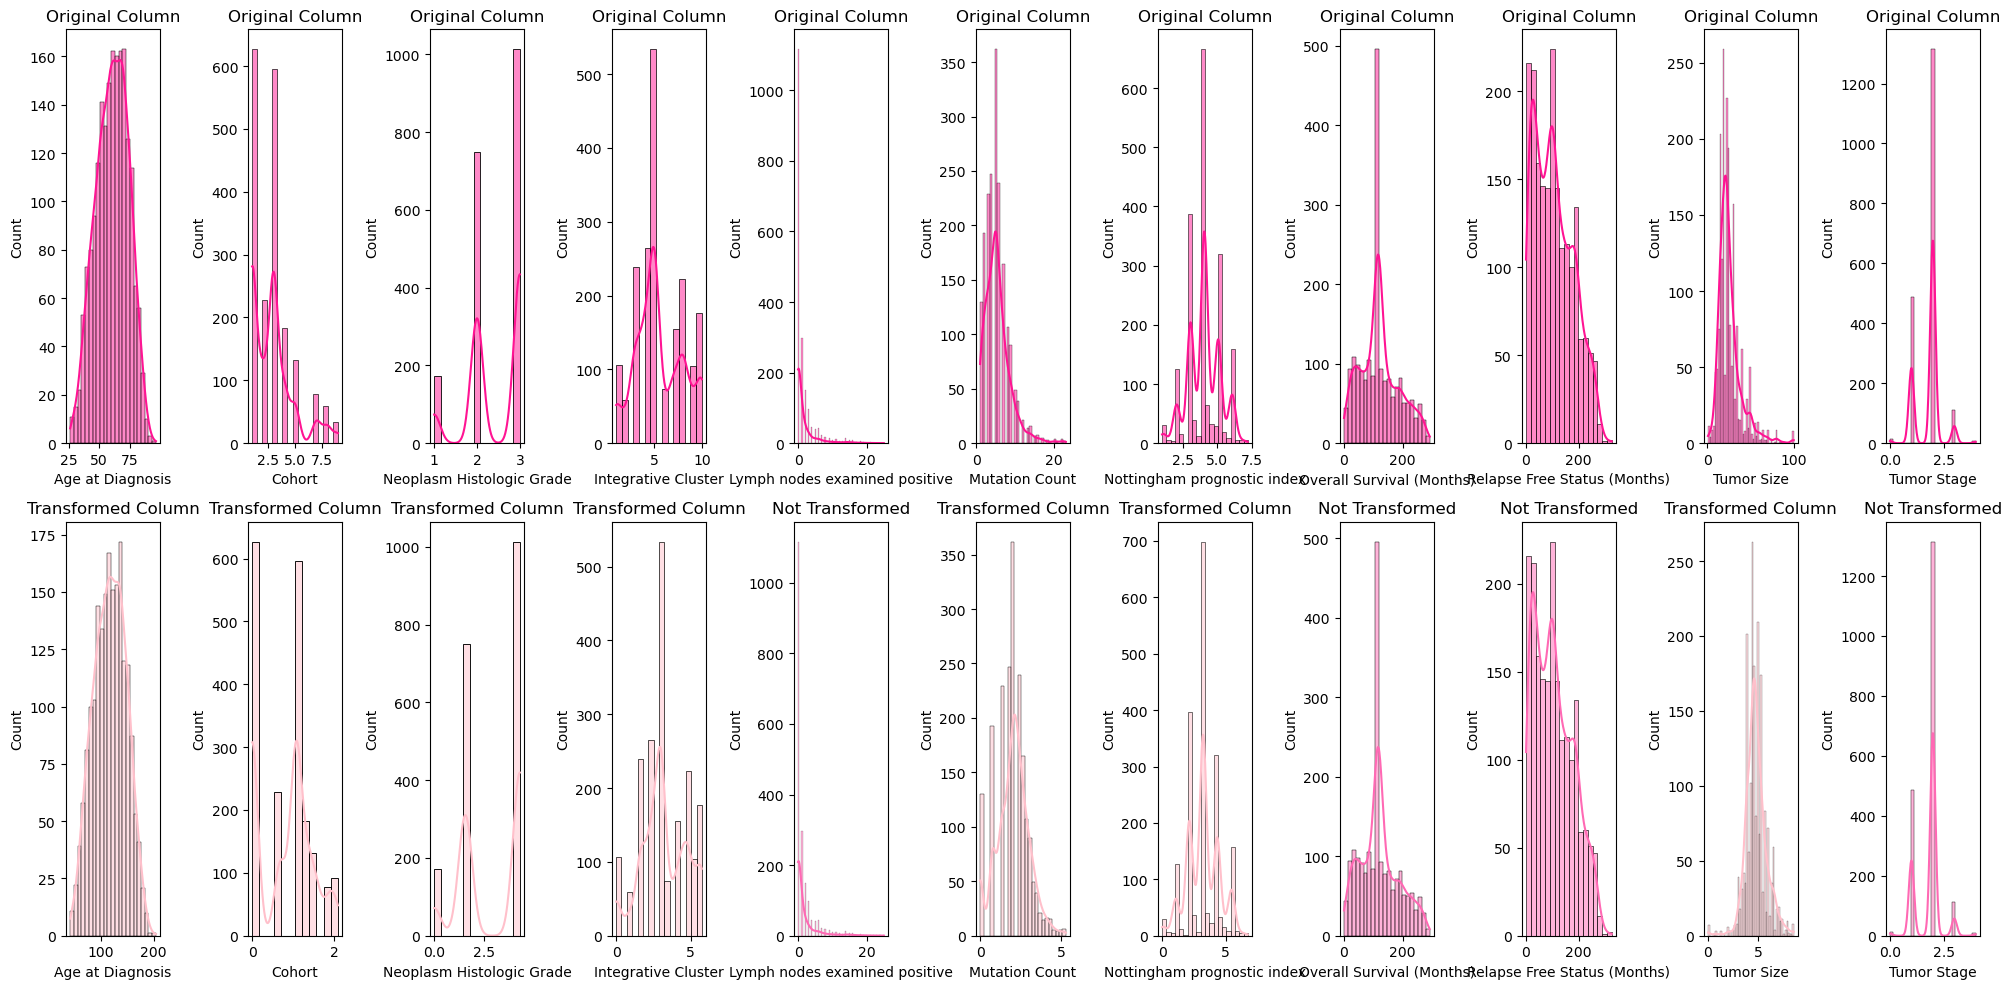

In [70]:
from scipy.stats import boxcox

# Defining the numerical columns you want to analyze
num_cols = X_train.iloc[:,[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]] 

# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 11, figsize=(20, 10))

# Original Distributions
for i, col in enumerate(num_cols):
    sns.histplot(X_train[col], kde=True, ax=ax[0, i], color='#FF1493').set_title(f'Original Column')

# Applying Box-Cox Transformation
lambdas = {}

# Applying Square Root Transformation
for i, col in enumerate(num_cols):
    # Only applying box cox transformation for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])  # Use 'lmbda' instead of 'lambda'
        sns.histplot(X_train[col], kde=True, ax=ax[1, i], color='pink').set_title(f'Transformed Column')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1, i], color='#FF69B4').set_title(f'Not Transformed')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
Here we can see that most of the columns except Lymph nodes examined positive, Relpase Free Status (Months), and Tumor Stage have transformed, making them look more normal-like. 

## <b><span style='color:#FF69B4'>Step 6.3 |</span><span style='color:#FF1493'>  Feature Scaling</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
We have used MinMaxScaler() to make sure that the scale of each feature is the same. Additionally, it can enhance the efficiency of algorithms like KNN or Support Vector Machines that depend on the scale of the input features.

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <b><span style='color:#FF69B4'>Step 6.4 |</span><span style='color:#FF1493'>  Feature Selection</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
We will use two feature selection methods to double-check, combine the best features selected by both, and use them in our model building.

### <b><span style='color:#FF69B4'>SelectKBest

In [79]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest to select top k features
selector = SelectKBest(score_func=chi2, k=32)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

Selected features: [ 1  3  4  6  8  9 10 19 20 21 22 23 24 25 28 30 33 40 41 43 45 46 51 52
 53 54 55 56 57 58 59 60]


### <b><span style='color:#FF69B4'>Recursive Feature Elimination

In [82]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model and RFE selector
model = RandomForestClassifier()

# Create the RFE object
rfe = RFE(estimator=model, n_features_to_select=32)

# Fit the RFE object to the training data
rfe.fit(X_train_scaled, y_train)

# Transform the training and test data
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Get selected feature indices
selected_features = rfe.get_support(indices=True)
print("Selected features:", selected_features)

Selected features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 20 21 24 25 40 41 44 45
 51 52 53 54 55 56 57 58]


In [84]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Select top 30 features using SelectKBest
selector = SelectKBest(score_func=chi2, k=28)
X_train_selected_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_selected_kbest = selector.transform(X_test_scaled)

# Select top 30 features using RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=32)
rfe.fit(X_train_scaled, y_train)
X_train_selected_rfe = rfe.transform(X_train_scaled)
X_test_selected_rfe = rfe.transform(X_test_scaled)

# Sort the feature indices to maintain order
# selected_features = sorted(selected_features)

# Combine the selected features from both methods
selected_features = sorted(set(selector.get_support(indices=True)).union(set(rfe.get_support(indices=True))))
X_train_final = X_train_scaled[:, selected_features]
X_test_final = X_test_scaled[:, selected_features]

print("Selected features:", selected_features)

Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 23, 24, 25, 28, 30, 33, 40, 41, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


# <p style="background-color:#FF1493; font-family:calibri; color:white; font-size:35px; text-align:center; border-radius:50px 50px;">7. Model Building</p>

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
    
In medical situations, having a **high recall (sensitivity)** for the positive class (the event that occurred) is frequently more crucial, particularly when diagnosing illnesses. Even if there are some false positives (cases where healthy people are mistakenly categorized as having the ailment), a high recall guarantees that the majority of the real positive instances are appropriately recognized. Generally speaking, it's preferable to have a few false alarms than to fail to diagnose a patient with a possible ailment.

## <b><span style='color:#FF69B4'>Step 7.1 |</span><span style='color:#FF1493'>  Decision Trees</span></b>

In [89]:
# Define parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Create Decision Tree model
dt = DecisionTreeClassifier()

# Perform Grid Search
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_final, y_train)

# Best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_

# Training and Evaluation
y_pred_dt = best_dt.predict(X_test_final)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average= 'weighted')
recall_dt = recall_score(y_test, y_pred_dt, average= 'weighted')
f1_dt = f1_score(y_test, y_pred_dt, average= 'weighted')
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree: Best parameters: {best_params_dt}")
print(f"Decision Tree: Accuracy: {accuracy_dt}")
print(f"Decision Tree: Precision: {precision_dt}")
print(f"Decision Tree: Recall: {recall_dt}")
print(f"Decision Tree: F1 Score: {f1_dt}")
print(f"Decision Tree: Confusion Matrix: \n{confusion_dt}")

Decision Tree: Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Decision Tree: Accuracy: 0.9276859504132231
Decision Tree: Precision: 0.9267136834475325
Decision Tree: Recall: 0.9276859504132231
Decision Tree: F1 Score: 0.9267832991124971
Decision Tree: Confusion Matrix: 
[[346  13]
 [ 22 103]]


In [91]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train_final)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1438
           1       0.93      0.92      0.93       498

    accuracy                           0.96      1936
   macro avg       0.95      0.95      0.95      1936
weighted avg       0.96      0.96      0.96      1936



In [93]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       359
           1       0.89      0.82      0.85       125

    accuracy                           0.93       484
   macro avg       0.91      0.89      0.90       484
weighted avg       0.93      0.93      0.93       484



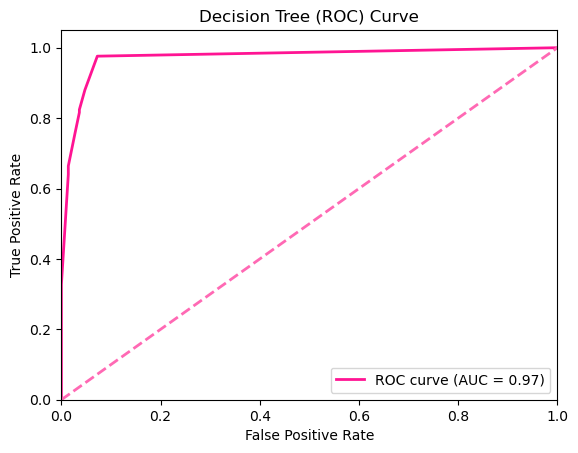

In [95]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC and plot
y_probs_dt = best_dt.predict_proba(X_test_final)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='#FF1493', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='#FF69B4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
Let's write a function that compiles the metrics of every model into a dataframe so that all models may be compared end-to-end later.

In [99]:
def evaluate_model(model, X_test_final, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test_final)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [101]:
dt_evaluation = evaluate_model(best_dt, X_test_final, y_test, 'dt')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
dt,0.94,0.89,0.96,0.82,0.95,0.85,0.91,0.89,0.9,0.93


## <b><span style='color:#FF69B4'>Step 7.2 |</span><span style='color:#FF1493'>  Logistic Regression</span></b>

In [104]:
# Define parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Create Logistic Regression model
lr = LogisticRegression(penalty='l2', C=1.0)

# Perform Grid Search
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_final, y_train)

# Best parameters and model
best_params_lr = grid_search_lr.best_params_
best_lr = grid_search_lr.best_estimator_

# Training and Evaluation
y_pred_lr = best_lr.predict(X_test_final)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average= 'weighted')
recall_lr = recall_score(y_test, y_pred_lr, average= 'weighted')
f1_lr = f1_score(y_test, y_pred_lr, average= 'weighted')
confusion_lr = confusion_matrix(y_test, y_pred_dt)

print(f"Logistic Regression: Best parameters: {best_params_lr}")
print(f"Logistic Regression: Accuracy: {accuracy_lr}")
print(f"Logistic Regression: Precision: {precision_lr}")
print(f"Logistic Regression: Recall: {recall_lr}")
print(f"Logistic Regression: F1 Score: {f1_lr}")
print(f"Logistic Regression: Confusion Matrix: \n{confusion_lr}")

Logistic Regression: Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression: Accuracy: 0.9421487603305785
Logistic Regression: Precision: 0.9421487603305785
Logistic Regression: Recall: 0.9421487603305785
Logistic Regression: F1 Score: 0.9421487603305785
Logistic Regression: Confusion Matrix: 
[[346  13]
 [ 22 103]]


In [106]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_lr.predict(X_train_final)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1438
           1       0.88      0.93      0.91       498

    accuracy                           0.95      1936
   macro avg       0.93      0.94      0.94      1936
weighted avg       0.95      0.95      0.95      1936



In [108]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_lr.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       359
           1       0.89      0.89      0.89       125

    accuracy                           0.94       484
   macro avg       0.92      0.92      0.92       484
weighted avg       0.94      0.94      0.94       484



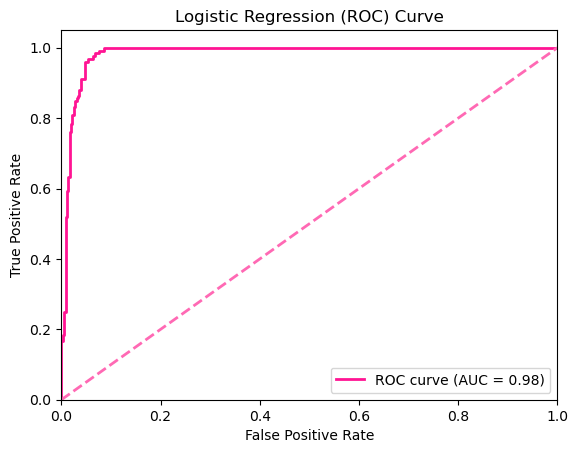

In [110]:
# Calculate ROC-AUC and plot
y_probs_lr = best_lr.predict_proba(X_test_final)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='#FF1493', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='#FF69B4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
lr_evaluation = evaluate_model(best_lr, X_test_final, y_test, 'lr')
lr_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
lr,0.96,0.89,0.96,0.89,0.96,0.89,0.92,0.92,0.92,0.94


## <b><span style='color:#FF69B4'>Step 7.3 |</span><span style='color:#FF1493'>  Support Vector Machine</span></b>

In [115]:
# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create SVM model
svm = SVC(kernel='rbf', C=1.0)

# Perform Grid Search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_final, y_train)

# Best parameters and model
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

# Training and Evaluation
y_pred_svm = best_svm.predict(X_test_final)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average= 'micro')
recall_svm = recall_score(y_test, y_pred_svm, average= 'micro')
f1_svm = f1_score(y_test, y_pred_svm, average= 'micro')
confusion_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM: Best parameters: {best_params_svm}")
print(f"SVM: Accuracy: {accuracy_svm}")
print(f"SVM: Precision: {precision_svm}")
print(f"SVM: Recall: {recall_svm}")
print(f"SVM: F1 Score: {f1_svm}")
print(f"SVM: Confusion Matrix: \n{confusion_svm}")

SVM: Best parameters: {'C': 10, 'gamma': 'auto'}
SVM: Accuracy: 0.9524793388429752
SVM: Precision: 0.9524793388429752
SVM: Recall: 0.9524793388429752
SVM: F1 Score: 0.9524793388429752
SVM: Confusion Matrix: 
[[341  18]
 [  5 120]]


In [117]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train_final)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1438
           1       0.89      0.97      0.93       498

    accuracy                           0.96      1936
   macro avg       0.94      0.96      0.95      1936
weighted avg       0.96      0.96      0.96      1936



In [119]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       359
           1       0.87      0.96      0.91       125

    accuracy                           0.95       484
   macro avg       0.93      0.95      0.94       484
weighted avg       0.96      0.95      0.95       484



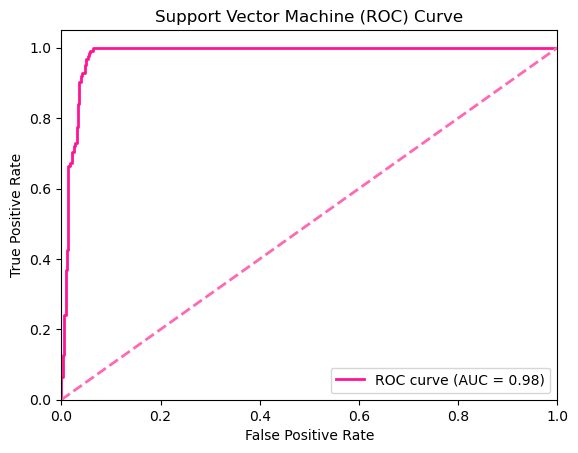

In [121]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate the SVC model
calibrated_clf = CalibratedClassifierCV(best_svm, cv='prefit')
calibrated_clf.fit(X_train_final, y_train)

# Get predicted probabilities
y_probs_svm = calibrated_clf.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC and plot
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='#FF1493', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='#FF69B4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [123]:
svm_evaluation = evaluate_model(best_svm, X_test_final, y_test, 'svm')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
svm,0.99,0.87,0.95,0.96,0.97,0.91,0.93,0.95,0.94,0.95


## <b><span style='color:#FF69B4'>Step 7.4 |</span><span style='color:#FF1493'>  K-Nearest Neighbors</span></b>

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [128]:
# Define parameter grid
param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN model
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_final, y_train)

# Best parameters and model
best_params_knn = grid_search_knn.best_params_
best_knn = grid_search_knn.best_estimator_

# Training and Evaluation
y_pred_knn = best_knn.predict(X_test_final)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average= 'weighted')
recall_knn = recall_score(y_test, y_pred_knn, average= 'weighted')
f1_knn = f1_score(y_test, y_pred_knn, average= 'weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN: Best parameters: {best_params_knn}")
print(f"KNN: Accuracy: {accuracy_knn}")
print(f"KNN: Precision: {precision_knn}")
print(f"KNN: Recall: {recall_knn}")
print(f"KNN: F1 Score: {f1_knn}")
print(f"KNN: Confusion Matrix: \n{confusion_knn}")

KNN: Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
KNN: Accuracy: 0.9276859504132231
KNN: Precision: 0.9278829981597885
KNN: Recall: 0.9276859504132231
KNN: F1 Score: 0.9277795740973082
KNN: Confusion Matrix: 
[[341  18]
 [ 17 108]]


In [130]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(X_train_final)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1438
           1       1.00      1.00      1.00       498

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936



In [132]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       359
           1       0.86      0.86      0.86       125

    accuracy                           0.93       484
   macro avg       0.90      0.91      0.91       484
weighted avg       0.93      0.93      0.93       484



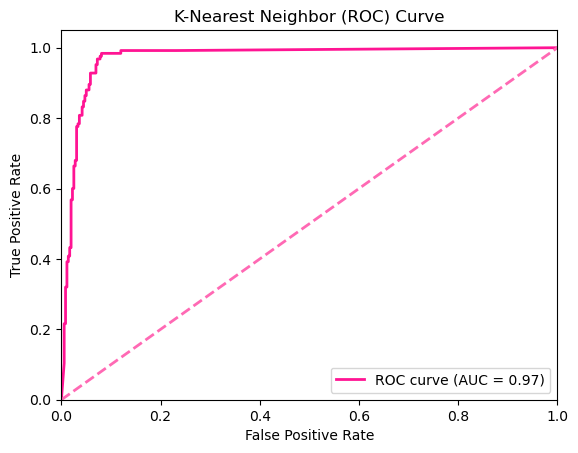

In [134]:
# Calculate ROC-AUC and plot
y_probs_knn = best_knn.predict_proba(X_test_final)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='#FF1493', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='#FF69B4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbor (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [136]:
knn_evaluation = evaluate_model(best_knn, X_test_final, y_test, 'knn')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
knn,0.95,0.86,0.95,0.86,0.95,0.86,0.9,0.91,0.91,0.93


## <b><span style='color:#FF69B4'>Step 7.5 |</span><span style='color:#FF1493'>  Naive Bayes</span></b>

In [139]:
# Create Naive Bayes model
nb = GaussianNB()

# Training and Evaluation
nb.fit(X_train_final, y_train)
y_pred_nb = nb.predict(X_test_final)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average= 'weighted')
recall_nb = recall_score(y_test, y_pred_nb, average= 'weighted')
f1_nb = f1_score(y_test, y_pred_nb, average= 'weighted')
confusion_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Naive Bayes: Accuracy: {accuracy_nb}")
print(f"Naive Bayes: Precision: {precision_nb}")
print(f"Naive Bayes: Recall: {recall_nb}")
print(f"Naive Bayes: F1 Score: {f1_nb}")
print(f"Naive Bayes: Confusion Matrix: \n{confusion_nb}")

Naive Bayes: Accuracy: 0.8615702479338843
Naive Bayes: Precision: 0.905694709127978
Naive Bayes: Recall: 0.8615702479338843
Naive Bayes: F1 Score: 0.868844367969044
Naive Bayes: Confusion Matrix: 
[[294  65]
 [  2 123]]


In [141]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, nb.predict(X_train_final)))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1438
           1       0.67      0.99      0.80       498

    accuracy                           0.87      1936
   macro avg       0.83      0.91      0.85      1936
weighted avg       0.91      0.87      0.88      1936



In [143]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, nb.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       359
           1       0.65      0.98      0.79       125

    accuracy                           0.86       484
   macro avg       0.82      0.90      0.84       484
weighted avg       0.91      0.86      0.87       484



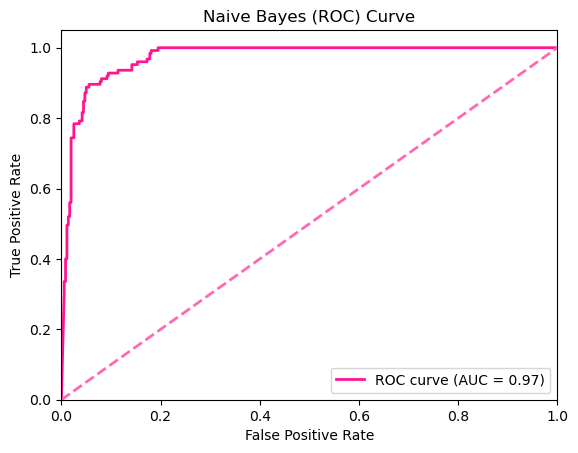

In [145]:
# Calculate ROC-AUC and plot
y_probs_nb = nb.predict_proba(X_test_final)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='#FF1493', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='#FF69B4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [147]:
nb_evaluation = evaluate_model(nb, X_test_final, y_test, 'nb')
nb_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
nb,0.99,0.65,0.82,0.98,0.9,0.79,0.82,0.9,0.84,0.86


## <b><span style='color:#FF69B4'>Step 7.6 |</span><span style='color:#FF1493'>  Random Forest</span></b>

In [150]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 3, 5, 10],
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_final, y_train)

# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Training and Evaluation
y_pred_rf = best_rf.predict(X_test_final)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average= 'weighted')
recall_rf = recall_score(y_test, y_pred_rf, average= 'weighted')
f1_rf = f1_score(y_test, y_pred_rf, average= 'weighted')
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest: Best parameters: {best_params_rf}")
print(f"Random Forest: Accuracy: {accuracy_rf}")
print(f"Random Forest: Precision: {precision_rf}")
print(f"Random Forest: Recall: {recall_rf}")
print(f"Random Forest: F1 Score: {f1_rf}")
print(f"Random Forest: Confusion Matrix: \n{confusion_rf}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest: Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest: Accuracy: 0.9380165289256198
Random Forest: Precision: 0.9373397524848408
Random Forest: Recall: 0.9380165289256198
Random Forest: F1 Score: 0.9371509172645537
Random Forest: Confusion Matrix: 
[[349  10]
 [ 20 105]]


In [152]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train_final)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1438
           1       0.91      0.93      0.92       498

    accuracy                           0.96      1936
   macro avg       0.94      0.95      0.94      1936
weighted avg       0.96      0.96      0.96      1936



In [154]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       359
           1       0.91      0.84      0.88       125

    accuracy                           0.94       484
   macro avg       0.93      0.91      0.92       484
weighted avg       0.94      0.94      0.94       484



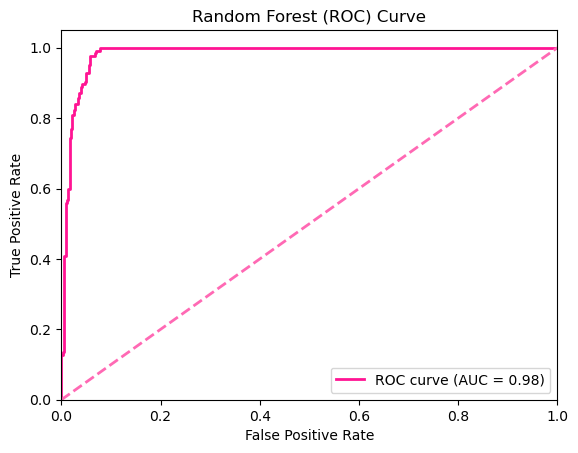

In [156]:
# Calculate ROC-AUC and plot
y_probs_rf = best_rf.predict_proba(X_test_final)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='#FF1493', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='#FF69B4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [158]:
rf_evaluation = evaluate_model(best_rf, X_test_final, y_test, 'rf')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
rf,0.95,0.91,0.97,0.84,0.96,0.88,0.93,0.91,0.92,0.94


## <b><span style='color:#FF69B4'>Step 7.7 |</span><span style='color:#FF1493'>  Comparative Analysis</span></b>

In [161]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, lr_evaluation, svm_evaluation, knn_evaluation, nb_evaluation, rf_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
nb,0.99,0.65,0.82,0.98,0.90,0.79,0.82,0.90,0.84,0.86
svm,0.99,0.87,0.95,0.96,0.97,0.91,0.93,0.95,0.94,0.95
lr,0.96,0.89,0.96,0.89,0.96,0.89,0.92,0.92,0.92,0.94
knn,0.95,0.86,0.95,0.86,0.95,0.86,0.90,0.91,0.91,0.93
rf,0.95,0.91,0.97,0.84,0.96,0.88,0.93,0.91,0.92,0.94
dt,0.94,0.89,0.96,0.82,0.95,0.85,0.91,0.89,0.90,0.93


<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">

**Key Metrics to Consider:**

**Accuracy:** This measures the overall correctness of the model's predictions.<br>
**Precision:** This measures the proportion of positive predictions that are actually positive.<br>
**Recall:** This measures the proportion of actual positive cases that are correctly identified.<br>
**F1-score:** This is the harmonic mean of precision and recall, providing a balanced measure of both.<br>

<br>**Interpreting the Results:**

Based on the comparative analysis, we can make some observations:
* Support Vector Machine followed by Logistic Regression appear to be strong contenders, with high precision, recall, and F1-scores.
* Naive Bayes also performs well, especially in terms of precision, but has a low precision and accuracy compared to SVM and LR.
* K-Nearest Neighbor, Random Forest, and Decision Trees have slightly lower performance compared to the top models.

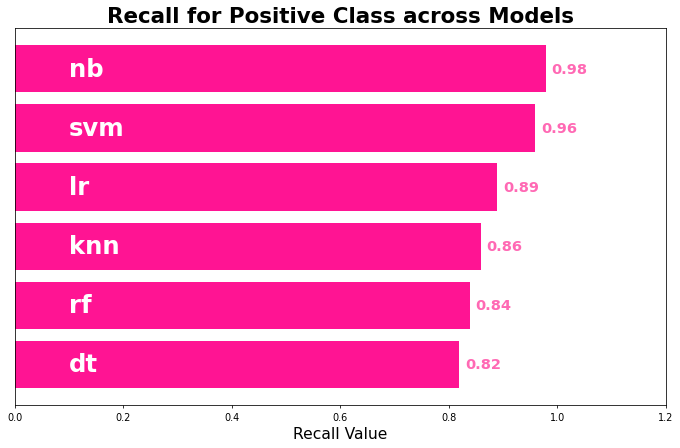

In [163]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='#FF1493')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='#FF69B4', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
The performance of the SVM model for medical diagnostics is generally positive. The SVM model shows a remarkable capacity to identify possible deaths of individuals who passed away from the illness. It is clear that nearly all patients who passed away from their illness are accurately identified, as evidenced by the class 1 recall of 0.96. In a medical setting, this is extremely important. Nonetheless, the model's well-balanced performance guarantees that precision is maintained while aiming for high recall.

# <p style="background-color:#FF1493; font-family:calibri; color:white; font-size:35px; text-align:center; border-radius:50px 50px;">8. Prediction</p>

### <b><span style='color:#FF69B4'>Predicting 10-Year Mortality Risk

<div style="border-radius:10px; padding: 15px; background-color: #FFB6C1; font-size:115%; text-align:left">
    
* Firstly the code calculates the survival probabilities based on the model's predictions. And, the formula 1 / (1 + np.exp(-predicted_probabilities)) is a common way to convert model outputs (often in the form of logits) into probabilities. 
* The mortality rate is simply the opposite of the survival rate. So, if you have the survival probability for a patient, you can get the mortality probability by subtracting the survival probability from 1.
* The final line calculates the 10-year mortality risk directly using the survival probabilities.

In [173]:
# Calibrate the SVC model
calibrated_clf = CalibratedClassifierCV(best_svm, cv='prefit')
calibrated_clf.fit(X_train_final, y_train)

# Since SVM is our selected model
predicted_probabilities = calibrated_clf.predict_proba(X_test_final)[:, 1]

# Convert probabilities to survival probabilities
survival_probabilities = 1 / (1 + np.exp(-predicted_probabilities))

# Calculate 10-year mortality risk
ten_year_mortality_risk = 1 - survival_probabilities**10

In [180]:
import gc
gc.collect()

84660